In [ ]:
# link 1

# https://www.kaggle.com/tenzinmigmar/galaxy-multi-image-classification-with-lenet-5

# https://astronn.readthedocs.io/en/latest/galaxy10sdss.html

In [ ]:
# first time through, get data downloaded:

# from astroNN.datasets import galaxy10

# images, labels = galaxy10.load_data()

# np.save('images_Galaxy10.npy', images)
# np.save('labels_Galaxy10.npy', labels)

### Y. Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Y. Galaxy data ingest

In [3]:
#data_path = 'C:/Users/m85302/Desktop/data4_local/astro_data/galaxy10_data/'
data_path = 'C:/Users/m85302/Desktop/data4_local/astro_data/galaxy10_data/npy_all_Galaxy10_data_asDownloaded/'

np_X = np.load(data_path + 'images_Galaxy10.npy')
np_y = np.load(data_path + 'labels_Galaxy10.npy')

print(np_X.shape, np_y.shape)

(21785, 69, 69, 3) (21785,)


from link 2:

Galaxy10 Dataset
The galaxy10 dataset is a dataset that contains 21785 69x69 pixels colored galaxy images with 10 different classes. The images from this dataset come from Sloan Digital Sky Survey and the labels come from Galaxy Zoo.

Each of the images within the dataset are classified under one of the 10 classes, however, there were discrepancies in the classes assigned to certain images from the human volunteers who were tasked with labelling the images which serves as empirical evidence that there is a high level of similarity in the images between the classes. To mitigate this issue, the Galaxy10 dataset does not include images where there was no definitive decision. (55% of votes casted by human volunteers towards one class)

In [4]:
df_y = pd.DataFrame({'Target': np_y})
df_y = df_y.reset_index()
display(df_y.head(3))
df_y['Target'].value_counts()

,index,Target
0,0,2
1,1,2
2,2,4


1    6997
2    6292
0    3461
4    1534
7    1121
8     906
6     589
9     519
3     349
5      17
Name: Target, dtype: int64

In [5]:
# use: https://astronn.readthedocs.io/en/latest/galaxy10sdss.html

df_y['Description'] = np.nan

df_y.loc[df_y.Target == 0, 'Description'] = 'Disk, Face-on, No Spiral'
df_y.loc[df_y.Target == 1, 'Description'] = 'Smooth, Completely round'
df_y.loc[df_y.Target == 2, 'Description'] = 'Smooth, in-between round'

df_y.loc[df_y.Target == 3, 'Description'] = 'Smooth, Cigar shaped'
df_y.loc[df_y.Target == 4, 'Description'] = 'Disk, Edge-on, Rounded Bulge'
df_y.loc[df_y.Target == 5, 'Description'] = 'Disk, Edge-on, Boxy Bulge'
df_y.loc[df_y.Target == 6, 'Description'] = 'Disk, Edge-on, No Bulge'
df_y.loc[df_y.Target == 7, 'Description'] = 'Disk, Face-on, Tight Spiral'
df_y.loc[df_y.Target == 8, 'Description'] = 'Disk, Face-on, Medium Spiral'
df_y.loc[df_y.Target == 9, 'Description'] = 'Disk, Face-on, Loose Spiral'

In [6]:
df_y['Description'].value_counts()

Smooth, Completely round        6997
Smooth, in-between round        6292
Disk, Face-on, No Spiral        3461
Disk, Edge-on, Rounded Bulge    1534
Disk, Face-on, Tight Spiral     1121
Disk, Face-on, Medium Spiral     906
Disk, Edge-on, No Bulge          589
Disk, Face-on, Loose Spiral      519
Smooth, Cigar shaped             349
Disk, Edge-on, Boxy Bulge         17
Name: Description, dtype: int64

### Y. Viz 1

In [7]:
features = ['Disk, Face-on, No Spiral', 
            'Smooth, Completely round', 
            'Smooth, in-between round', 
            'Smooth, Cigar shaped', 
            'Disk, Edge-on, Rounded Bulge', 
            'Disk, Edge-on, Boxy Bulge',
            'Disk, Edge-on, No Bulge',
            'Disk, Face-on, Tight Spiral', 
            'Disk, Face-on, Medium Spiral', 
            'Disk, Face-on, Loose Spiral']

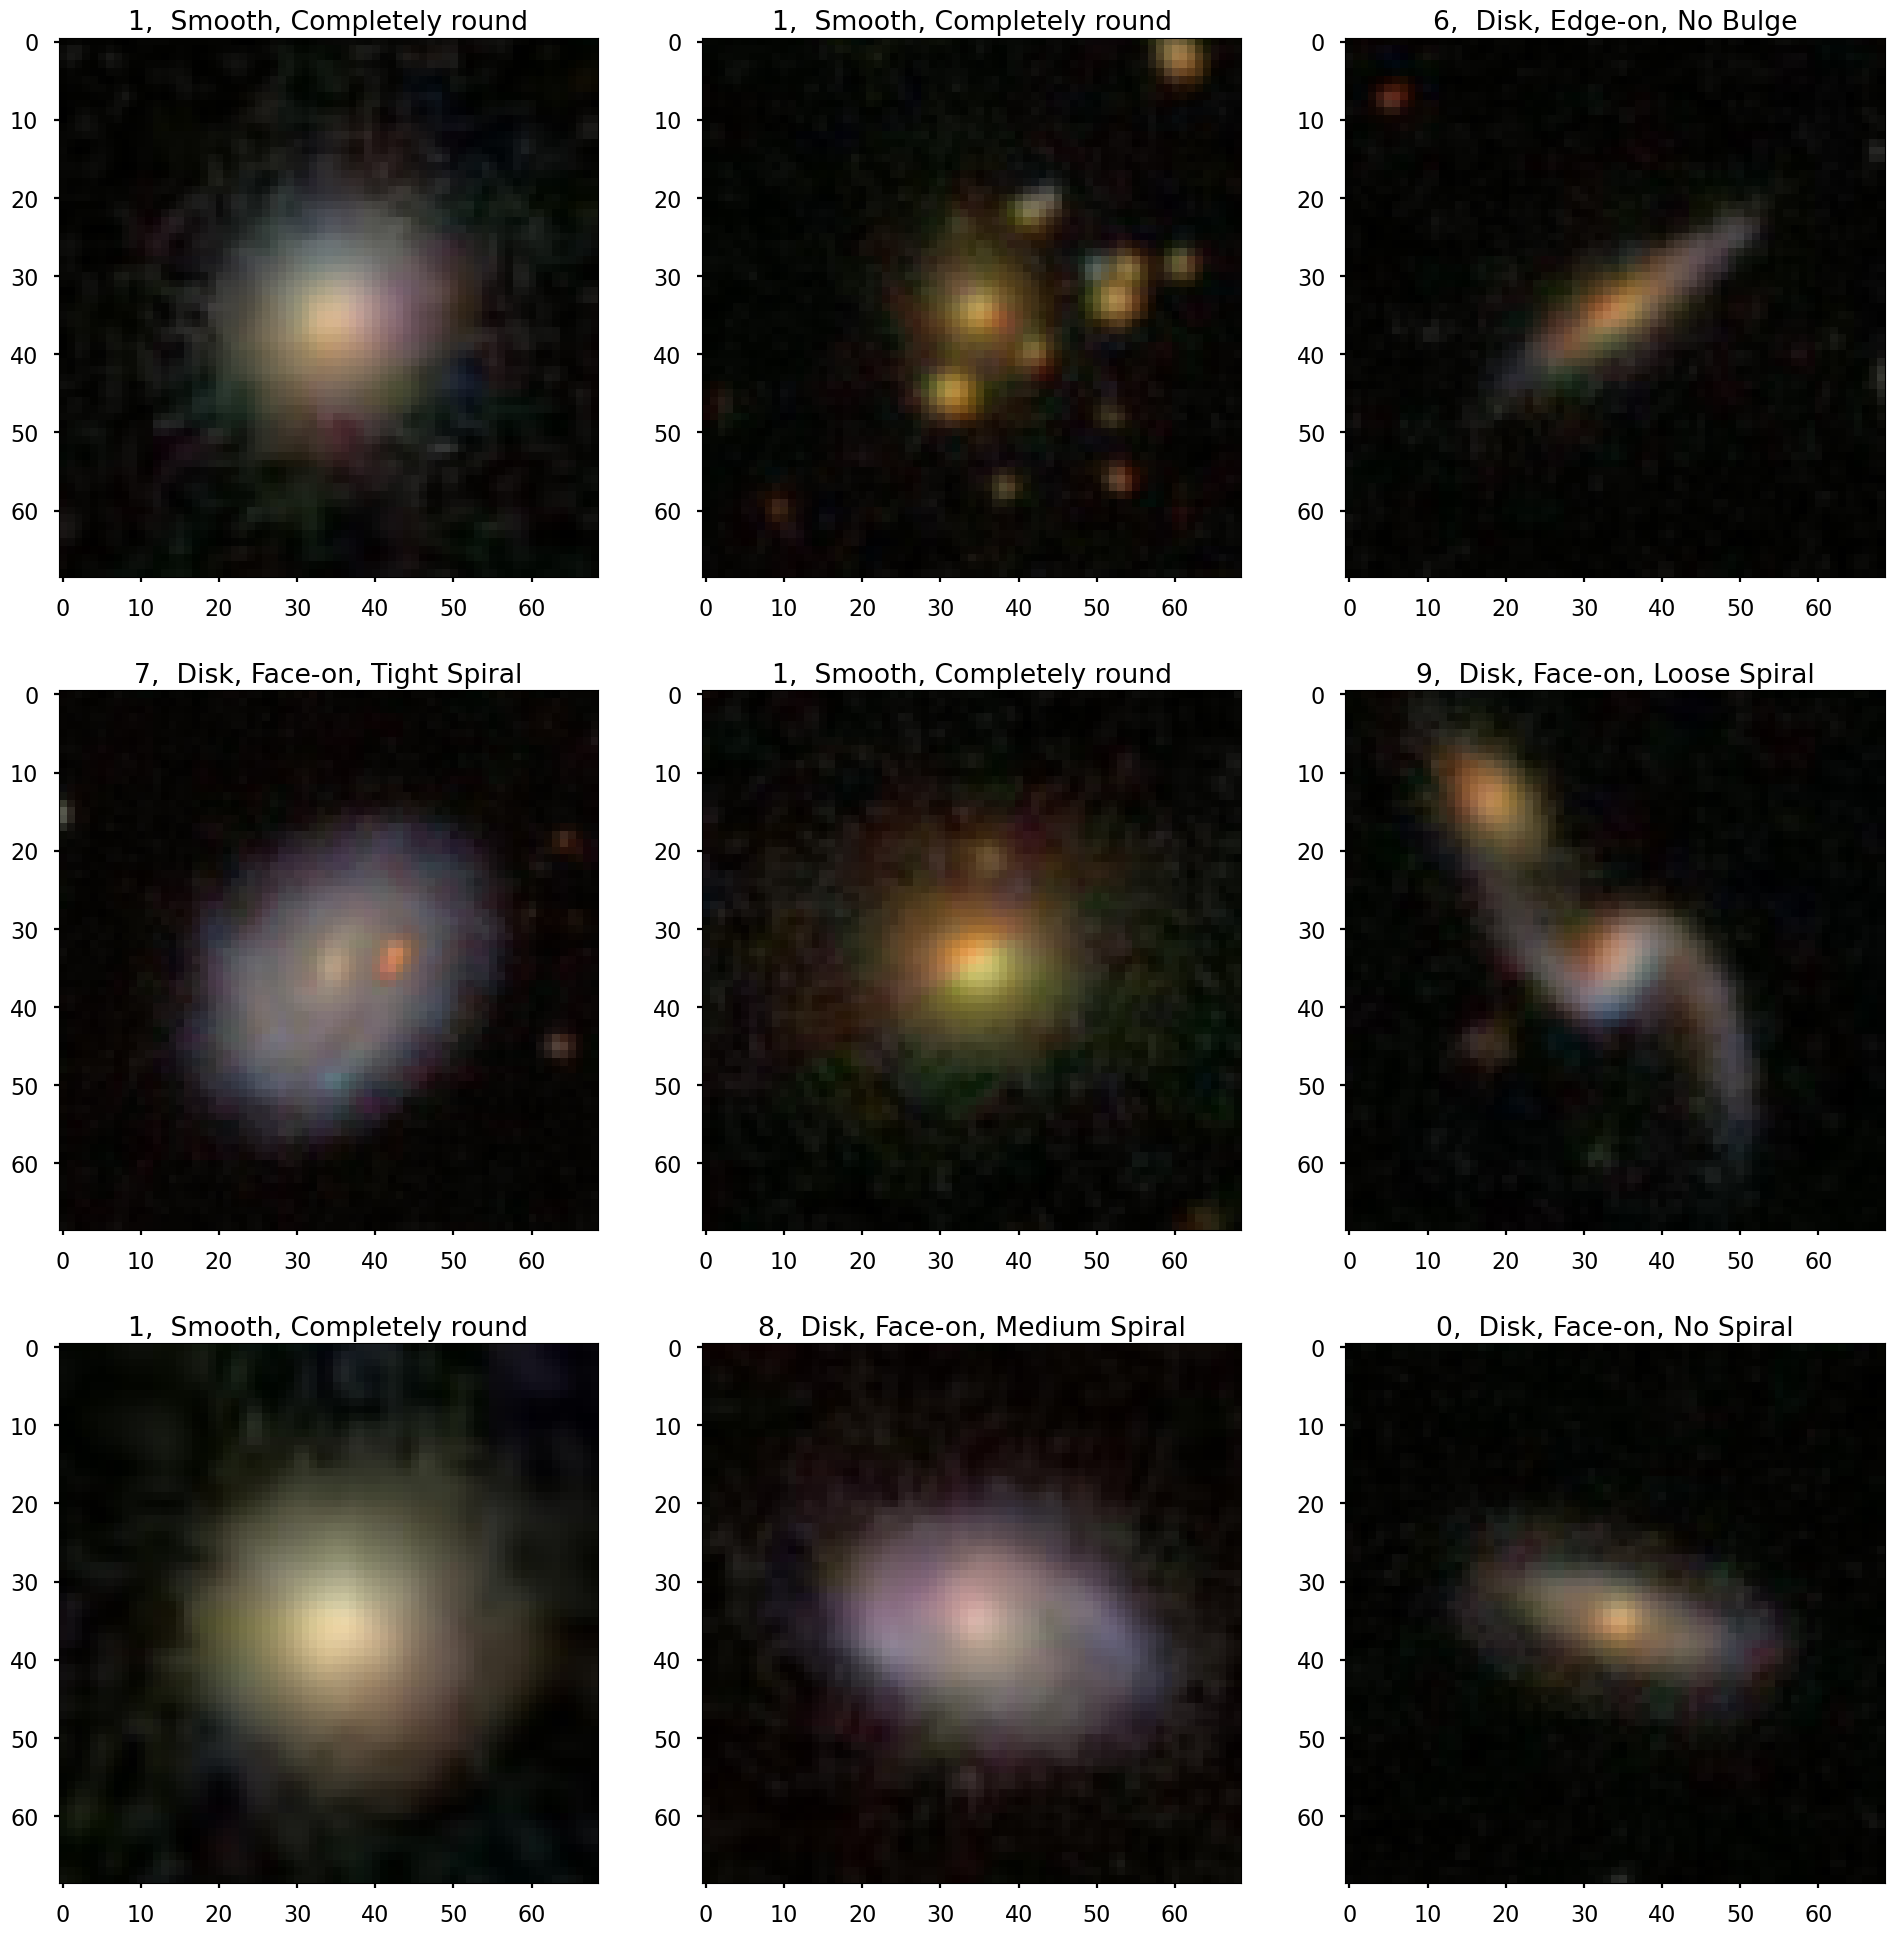

In [12]:
fig = plt.figure(figsize=(20,20)) 

plt.style.use('default')
plt.style.use('seaborn-poster')

#for i in range(25):
#    plt.subplot(5,5,i+1)   
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(np_X[i+45])
    plt.title(str(np_y[i+45]) + ',  ' + features[np_y[i+45]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
plt.style.use('default')
i = 10
plt.imshow(np_X[i]);
plt.title(np_y[i]);

### Y. Create jpg from npy

In [ ]:
def filter_target(df_y_in, np_X_in, target_num):
    '''
    '''
    df_y_sel = df_y_in[df_y_in['Target'] == target_num]
    y_sel_index = df_y_sel['index'].values
    np_X_sel = np_X_in[y_sel_index, :, :, :]
    
    return np_X_sel

In [ ]:
def npy_to_jpg(np_X_sel, classNum, title, save_folder_path):
    '''
    '''
    for i in range(0, np_X_sel.shape[0]):
        plt.imsave(save_folder_path + str(classNum) + '_' + title + '_' + str(i) + '.jpg', 
                   np_X_sel[i])

In [ ]:
#display(df_y['Target'].value_counts())
#display(df_y['Description'].value_counts())

In [ ]:
#class_num = 1
#class_num_for_name = 0
#title = 'Smooth-Completely-round'
#save_folder_path = './1_Smooth-Completely-round_Galaxy10/'

#class_num = 7
#class_num_for_name = 1
#title = 'Disk, Face-on, Tight Spiral'
#save_folder_path = './7_Disk-FaceOn-TightSpiral_Galaxy10/'

#class_num = 8
#class_num_for_name = 1
#title = 'Disk, Face-on, Medium Spiral'
#save_folder_path = './8_Disk-FaceOn-MediumSpiral_Galaxy10/'

class_num = 9
class_num_for_name = 1
title = 'Disk, Face-on, Loose Spiral'
save_folder_path = './9_Disk_FaceOn_LooseSpiral_Galaxy10/'


np_X_1 = filter_target(df_y, np_X, class_num)
np_X_sel = np_X_1.copy()

npy_to_jpg(np_X_sel, 
           #class_num, 
           class_num_for_name,
           title, 
           save_folder_path)